In [1]:
# finally I may have achieved excalibur. But lets check

#First importing the files:
from PIL import Image
from IPython.display import display
import numpy as np
import time
import os
from random import randint
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
path = 'files/unlabelled/'
key_path = 'files/keys/'
list_of_captcha = os.listdir(path)
list_of_keys = os.listdir(key_path)

In [2]:
# This function first selects random captcha from the list of captchas and then convert to 
# test.png file.  Also comverts image to binary image.
def get_random_captcha(img = ''):
    if img == '':
        img = list_of_captcha[randint(0,len(list_of_captcha))]
        img = path + img
    image = Image.open(img).convert("L")
    pixel_matrix = np.array(image)
    for col in range(pixel_matrix.shape[1]-1):
        for row in range(pixel_matrix.shape[0]-1):
            if pixel_matrix[row,col] == 250:
                pixel_matrix[row,col] = 0
            if pixel_matrix[row, col] == 86:
                pixel_matrix[row, col] = 255
    changed_image = Image.fromarray(pixel_matrix)
    changed_image.save("test.png")

# This function removes all the lines and other noisy stuff from the image    
def remove_noise():
    img = cv2.imread("test.png",0)
    plt.imshow(img)
    plt.show()
    kernel_mor = np.ones((2,2),np.uint8)
    kernel_ero = np.ones((1,1), np.uint8)
    morph = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel_mor)
    ero = cv2.erode(morph,kernel_ero, iterations =1)
    # I'm not showing the morphed image and also not storing that image
    plt.imshow(ero)
    plt.show()
    cv2.imwrite("erosion.png", ero)

# this function reads the erosion. png image and then tell most frequent 6 letters
def detect_letters():
    max_detail = []
    img = cv2.imread('erosion.png', 0)
    for key_file in list_of_keys:
        template = cv2.imread(key_path + key_file, 0)
        w,h = template.shape[::-1]
        res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        max_detail.append((key_file, max_val, max_loc))
    # Now sort the files according to max_val and find the top 6
    # TODO: solve for multiple occurances
    raw_letters =  sorted(sorted(max_detail, key=lambda x : x[1], reverse = True)[0:6], key=lambda x:x[2][0])
    captcha_val = ''
    for letter in raw_letters:
        captcha_val = captcha_val + letter[0][0].upper()
    return captcha_val
        
    

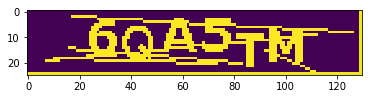

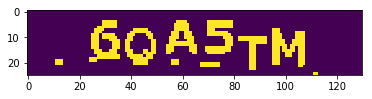

Detected Capctha  6QA5TM


In [6]:
get_random_captcha()
remove_noise()
print("Detected Capctha ", detect_letters())